Problem Statement:
1. Make a CNN model
2. Building Cat and Dog classifier model
3. Test the accuracy and reduce the overfitting problem using Dropout and BatchNormalization.

In [ ]:
 
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 270MB/s]
100% 1.06G/1.06G [00:04<00:00, 241MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#generator 
train_Set = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

test_Set= keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/256. , tf.float32)
  return image,label

train_Set = train_Set.map(process)
test_Set = test_Set.map(process)

In [ ]:
train_Set 

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#create_CNN_model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding="valid",activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu" ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding="valid", strides=2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                     

In [ ]:
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(train_Set, epochs=10, validation_data=test_Set)

Epoch 1/10
625/625 [==============================] - 67s 102ms/step - loss: 1.1555 - accuracy: 0.6119 - val_loss: 0.5667 - val_accuracy: 0.7070
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5553 - accuracy: 0.7163 - val_loss: 0.5128 - val_accuracy: 0.7492
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4637 - accuracy: 0.7826 - val_loss: 0.5437 - val_accuracy: 0.7528
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4042 - accuracy: 0.8172 - val_loss: 0.4893 - val_accuracy: 0.7708
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3422 - accuracy: 0.8480 - val_loss: 0.7146 - val_accuracy: 0.6806
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2693 - accuracy: 0.8845 - val_loss: 0.4931 - val_accuracy: 0.8020
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2029 - accuracy: 0.9172 - val_loss: 0.8501 - val_ac

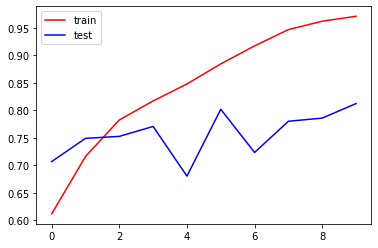

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="test")
plt.legend()
plt.show()

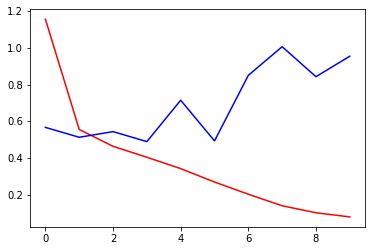

In [ ]:
plt.plot(history.history["loss"],color="red", label="train")
plt.plot(history.history["val_loss"],color="blue", label="test")

Prediction

In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/images.jpg")

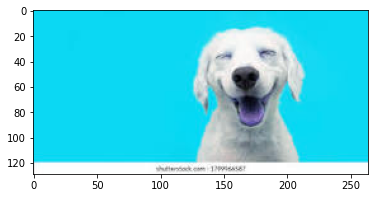

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(129, 264, 3)

In [ ]:
test_input = cv2.resize(img,(256,256))

In [ ]:
test_input.shape

(256, 256, 3)

In [ ]:
test_input = test_input.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 314ms/step


array([[1.]], dtype=float32)

In [ ]:
img_cat = cv2.imread("/content/img_cat.jpg")

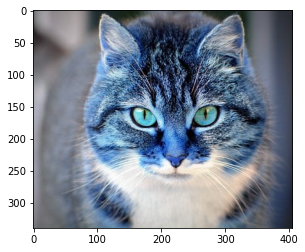

In [ ]:
plt.imshow(img_cat)

In [ ]:
img_cat.shape

(340, 405, 3)

In [ ]:
img_cat = cv2.resize(img_cat,(256,256))

In [ ]:
img_cat.shape

(256, 256, 3)

In [ ]:
img_cat = img_cat.reshape(1, 256,256,3)

In [ ]:
img_cat.shape

(1, 256, 256, 3)

In [ ]:
model.predict(img_cat)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

The accuracy of the model is 81.24% which is the good accuracy. If the dataset would be large enough then the accuracy would be more.

This model can accurately identified the cat and dog image.